# **Project Name**    -   Data Analysis on Hotels Booking



##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -**  Varun Pal
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

📊 Hotel Booking Cancellation Analysis - Project Summary
In this project, I conducted an exploratory data analysis (EDA) on a large hotel booking dataset containing over 110,000 records. The primary objective was to identify the key factors affecting hotel booking cancellations and to gain insights into customer behavior patterns across two hotel types: City Hotel and Resort Hotel.

✅ Data Overview
The dataset contained multiple columns such as 'hotel', 'is_canceled', 'lead_time', 'arrival_date_month', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'adults', 'children', 'babies', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'reservation_status', and 'reservation_status_date'. The target column for most of the analysis was 'is_canceled', which indicates whether a booking was canceled (1) or not (0).

✅ Hotel Type and Cancellation Analysis
I first analyzed the cancellation rate between City Hotels and Resort Hotels. Using bar plots, I observed that City Hotels had a higher number of cancellations in absolute terms, but when calculating the percentage cancellation rate, the difference between hotel types became clearer.

✅ Guest Composition Analysis
I categorized guests into three types:

Adults with Kids (at least one adult and one child or baby),

Solo Travelers (single adult with no kids),

Adults without Kids but not Solo (two or more adults with no children or babies).

For each group, I calculated both their proportion in total bookings and their individual cancellation rates. I plotted these using pie charts and bar plots. Solo travelers showed the highest cancellation rate, while adults with kids had the lowest, indicating families were more likely to follow through with their bookings.

✅ Seasonal Trends
By analyzing the 'arrival_date_month' column, I identified months with higher cancellation rates. Months like June, August, and September had noticeably higher cancellation percentages, pointing towards seasonal patterns in guest behavior.

✅ Distribution Channel and Market Segment Impact
The 'market_segment' and 'distribution_channel' columns revealed interesting trends. I calculated cancellation rates for each segment and channel. Online Travel Agents (OTA) and Group bookings had the highest cancellation percentages, while Corporate and Direct bookings had lower cancellation rates.

✅ Days in Waiting List Effect
One of the strongest findings was the relationship between 'days_in_waiting_list' and cancellations. I used boxplots, violin plots, and scatter plots (with jitter and sampling) to show that longer waiting list days were strongly associated with higher cancellation likelihood.

✅ Numerical Analysis and Correlation
To meet the project requirement of including a pair plot, I created a pair plot using six meaningful variables: 'is_canceled', 'lead_time', 'days_in_waiting_list', 'adults', 'children', and 'babies'. This helped visualize multivariate relationships and how they impacted booking cancellations.

✅ Statistical Category Correlation
For categorical columns like 'market_segment', I calculated cancellation percentages for each category and visualized them using horizontal bar plots with annotations. I also excluded undefined or null categories to avoid distortion.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**Problem Statement:**

The primary goal of this project is to analyze the hotel booking dataset and uncover key factors contributing to booking cancellations. By understanding the patterns, trends, and customer behaviors associated with cancellations, we aim to provide actionable insights that can help hotels reduce cancellation rates, increase confirmed bookings, and improve overall revenue stability.

#### **Define Your Business Objective?**

Reduce cancellations and drive more confirmed stays

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [6]:
# Load Dataset
path = "/content/drive/MyDrive/Colab Notebooks/Hotel booking/Hotel Bookings.xlsx"
df = pd.read_excel(path)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset First View

In [ ]:
# Dataset First Look
df.head(12)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(119390, 32)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(31994)

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


<Axes: >

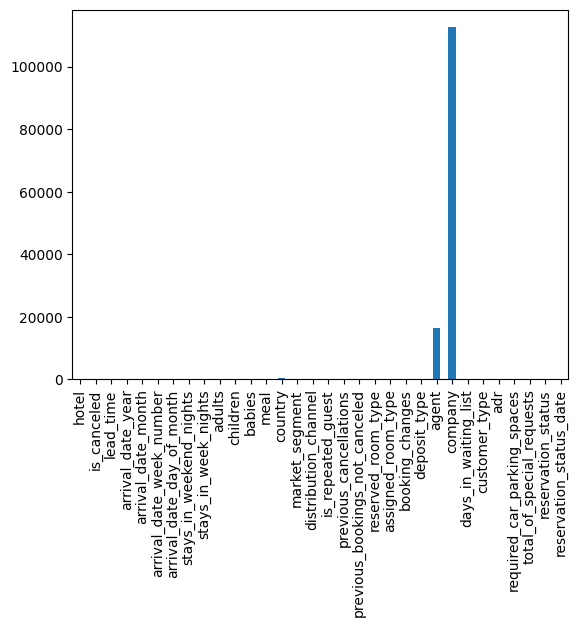

In [ ]:
# Visualizing the missing values
df.isnull().sum().plot(kind='bar')

In [ ]:
null_counts = df.isnull().sum()
null_counts = null_counts[null_counts > 0]  # filter early to save space

#NUll Percentage in columns
print((null_counts / len(df)) * 100)


children     0.003350
country      0.408744
agent       13.686238
company     94.306893
dtype: float64


### What did you know about your dataset?

That more than 90% of values in company column are null hence we can't use company's column to make any predictions from our given data

## ***2. Understanding Your Variables***

In [7]:
# Dataset Columns
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,...,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,...,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363,2016-07-30 00:24:47.883407104
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000,2016-02-01 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000,2016-08-07 00:00:00
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000,2017-02-08 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,...,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,...,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798,NaN


In [9]:
df['is_canceled'].value_counts(normalize=True) * 100

,proportion
is_canceled,
0,62.958372
1,37.041628


<Axes: xlabel='arrival_date_month'>

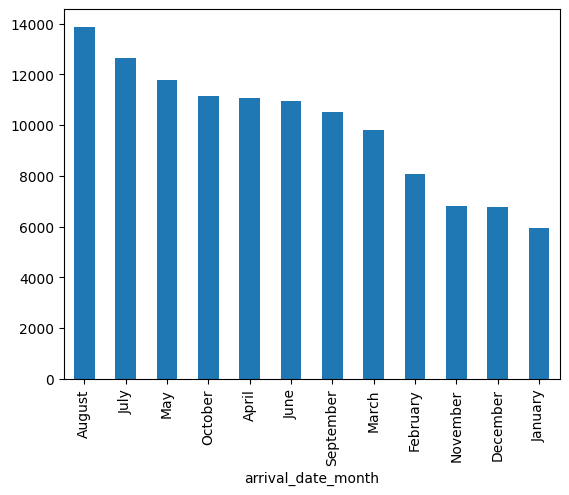

In [10]:
df['arrival_date_month'].value_counts(normalize=True) * 100
df['arrival_date_month'].value_counts().plot(kind='bar')

In [11]:
df[['adults', 'children', 'babies']].value_counts(normalize=True) * 100

adults  children  babies
2       0.0       0         68.313705
1       0.0       0         18.910928
3       0.0       0          4.745112
2       1.0       0          3.308596
        2.0       0          2.697971
        0.0       1          0.593034
3       1.0       0          0.406245
1       1.0       0          0.232021
0       2.0       0          0.171712
        0.0       0          0.150771
1       2.0       0          0.129831
2       1.0       1          0.113916
        3.0       0          0.051095
4       0.0       0          0.049420
3       2.0       0          0.032667
2       2.0       1          0.022616
        0.0       2          0.010051
0       3.0       0          0.009214
3       0.0       1          0.008376
1       0.0       1          0.007539
26      0.0       0          0.004188
0       1.0       0          0.003350
1       3.0       0          0.003350
2       1.0       2          0.002513
0       2.0       1          0.002513
27      0.0       0          0.001675
20      0.0       0          0.001675
1       2.0       1          0.001675
        1.0       1          0.001675
5       0.0       0          0.001675
3       1.0       1          0.001675
4       1.0       0          0.001675
1       0.0       9          0.000838
2       10.0      0          0.000838
        0.0       10         0.000838
4       0.0       1          0.000838
10      0.0       0          0.000838
6       0.0       0          0.000838
40      0.0       0          0.000838
50      0.0       0          0.000838
55      0.0       0          0.000838
Name: proportion, dtype: float64

Text(0, 0.5, 'People')

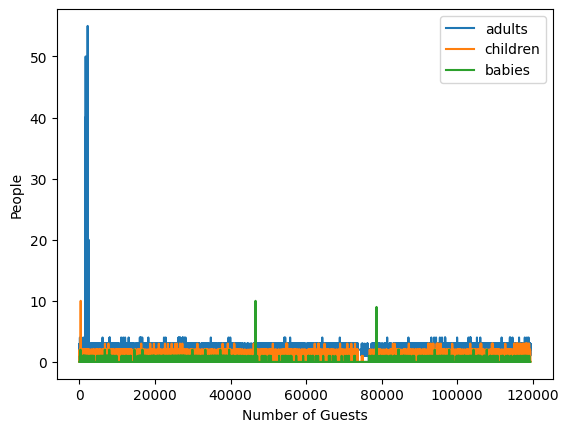

In [12]:
df[['adults', 'children', 'babies']].plot().lines
# set x-axis and y-axis
plt.xlabel('Number of Guests')
plt.ylabel('People')

In [13]:
# Guests Every Year
df['arrival_date_year'].value_counts(normalize=True) * 100

,proportion
arrival_date_year,
2016,47.497278
2017,34.079069
2015,18.423654


<Axes: xlabel='arrival_date_year'>

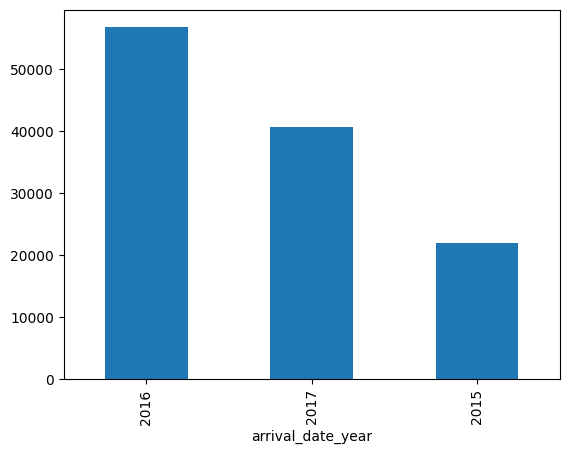

In [14]:
df['arrival_date_year'].value_counts().plot(kind='bar')

In [15]:
#repeated guests
df['is_repeated_guest'].value_counts(normalize=True) * 100

,proportion
is_repeated_guest,
0,96.808778
1,3.191222


More than 90% of guests are new and even less than 5% of guests are repeted.

### Variables Description

In [16]:
df['hotel']  # Type of hotel: "City Hotel" or "Resort Hotel"

,hotel
0,Resort Hotel
1,Resort Hotel
2,Resort Hotel
3,Resort Hotel
4,Resort Hotel
...,...
119385,City Hotel
119386,City Hotel
119387,City Hotel
119388,City Hotel


In [17]:
df['is_canceled']  # Whether the booking was canceled (1 = Yes, 0 = No)

,is_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [18]:
df['lead_time']  # Number of days between booking date and arrival date

,lead_time
0,342
1,737
2,7
3,13
4,14
...,...
119385,23
119386,102
119387,34
119388,109


In [19]:
df['arrival_date_year']  # Year of arrival date (e.g., 2015, 2016, 2017)


,arrival_date_year
0,2015
1,2015
2,2015
3,2015
4,2015
...,...
119385,2017
119386,2017
119387,2017
119388,2017


In [20]:
df['arrival_date_month']  # Month name of arrival (e.g., January, February)


,arrival_date_month
0,July
1,July
2,July
3,July
4,July
...,...
119385,August
119386,August
119387,August
119388,August


In [21]:
df['arrival_date_week_number']  # Week number of arrival in the year (1–53)


,arrival_date_week_number
0,27
1,27
2,27
3,27
4,27
...,...
119385,35
119386,35
119387,35
119388,35


In [22]:
df['arrival_date_day_of_month']  # Day of the month guest is scheduled to arrive (1–31)


,arrival_date_day_of_month
0,1
1,1
2,1
3,1
4,1
...,...
119385,30
119386,31
119387,31
119388,31


In [23]:
df['stays_in_weekend_nights']  # Number of weekend nights (Saturday/Sunday) the guest stayed


,stays_in_weekend_nights
0,0
1,0
2,0
3,0
4,0
...,...
119385,2
119386,2
119387,2
119388,2


In [24]:
df['stays_in_week_nights']  # Number of weekday nights (Monday–Friday) stayed


,stays_in_week_nights
0,0
1,0
2,1
3,1
4,2
...,...
119385,5
119386,5
119387,5
119388,5


In [25]:
df['adults']  # Number of adults in the booking


,adults
0,2
1,2
2,1
3,1
4,2
...,...
119385,2
119386,3
119387,2
119388,2


In [26]:
df['children']  # Number of children in the booking


,children
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
119385,0.0
119386,0.0
119387,0.0
119388,0.0


In [27]:
df['babies']  # Number of babies in the booking


,babies
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [28]:
df['meal']  # Type of meal plan booked (e.g., BB, HB, FB)


,meal
0,BB
1,BB
2,BB
3,BB
4,BB
...,...
119385,BB
119386,BB
119387,BB
119388,BB


In [29]:
df['country']  # Country of origin of the guest (ISO country code)


,country
0,PRT
1,PRT
2,GBR
3,GBR
4,GBR
...,...
119385,BEL
119386,FRA
119387,DEU
119388,GBR


In [30]:
df['market_segment']  # Source of booking (e.g., Online TA, Direct, Corporate)


,market_segment
0,Direct
1,Direct
2,Direct
3,Corporate
4,Online TA
...,...
119385,Offline TA/TO
119386,Online TA
119387,Online TA
119388,Online TA


In [31]:
df['distribution_channel']  # Channel through which booking was made (e.g., TA/TO, Direct)


,distribution_channel
0,Direct
1,Direct
2,Direct
3,Corporate
4,TA/TO
...,...
119385,TA/TO
119386,TA/TO
119387,TA/TO
119388,TA/TO


In [32]:
df['is_repeated_guest']  # Whether the guest has booked previously (1 = Yes, 0 = No)


,is_repeated_guest
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [33]:
df['previous_cancellations']  # Number of previous bookings canceled by the customer


,previous_cancellations
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [34]:
df['previous_bookings_not_canceled']  # Number of previous bookings not canceled by the customer


,previous_bookings_not_canceled
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [35]:
df['reserved_room_type']  # Room type the guest originally reserved (single letter codes)


,reserved_room_type
0,C
1,C
2,A
3,A
4,A
...,...
119385,A
119386,E
119387,D
119388,A


In [36]:
df['assigned_room_type']  # Room type the guest actually stayed in (may differ from reserved)


,assigned_room_type
0,C
1,C
2,C
3,A
4,A
...,...
119385,A
119386,E
119387,D
119388,A


In [37]:
df['booking_changes']  # Number of changes made to the booking (date, room, etc.)


,booking_changes
0,3
1,4
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [38]:
df['deposit_type']  # Deposit type (No Deposit, Non Refund, Refundable)


,deposit_type
0,No Deposit
1,No Deposit
2,No Deposit
3,No Deposit
4,No Deposit
...,...
119385,No Deposit
119386,No Deposit
119387,No Deposit
119388,No Deposit


In [39]:
df['agent']  # ID of travel agent (numeric code, 0 if none)


,agent
0,NaN
1,NaN
2,NaN
3,304.0
4,240.0
...,...
119385,394.0
119386,9.0
119387,9.0
119388,89.0


In [40]:
df['company']  # ID of the company making the booking (numeric code, 0 if none)


,company
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
119385,NaN
119386,NaN
119387,NaN
119388,NaN


In [41]:
df['days_in_waiting_list']  # Number of days the booking was on the waiting list


,days_in_waiting_list
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [ ]:
df['customer_type']  # Type of customer (e.g., Contract, Transient, Group)


In [42]:
df['adr']  # Average Daily Rate (price per night per room)


,adr
0,0.00
1,0.00
2,75.00
3,75.00
4,98.00
...,...
119385,96.14
119386,225.43
119387,157.71
119388,104.40


In [43]:
df['required_car_parking_spaces']  # Number of parking spaces requested


,required_car_parking_spaces
0,0
1,0
2,0
3,0
4,0
...,...
119385,0
119386,0
119387,0
119388,0


In [44]:
df['total_of_special_requests']  # Number of special requests (e.g., high floor, twin beds)


,total_of_special_requests
0,0
1,0
2,0
3,0
4,1
...,...
119385,0
119386,2
119387,4
119388,0


In [45]:
df['reservation_status']  # Final status (e.g., Canceled, Check-Out, No-Show)


,reservation_status
0,Check-Out
1,Check-Out
2,Check-Out
3,Check-Out
4,Check-Out
...,...
119385,Check-Out
119386,Check-Out
119387,Check-Out
119388,Check-Out


In [46]:
df['reservation_status_date']  # Date when the reservation status was set (like cancellation date)


,reservation_status_date
0,2015-07-01
1,2015-07-01
2,2015-07-02
3,2015-07-02
4,2015-07-03
...,...
119385,2017-09-06
119386,2017-09-07
119387,2017-09-07
119388,2017-09-07


### Check Unique Values for each variable.

In [47]:
# Check Unique Values for each variable.
df.nunique()

,0
hotel,2
is_canceled,2
lead_time,479
arrival_date_year,3
arrival_date_month,12
arrival_date_week_number,53
arrival_date_day_of_month,31
stays_in_weekend_nights,17
stays_in_week_nights,35
adults,14


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
df.drop('company', axis=1, inplace=True)

### What all manipulations have you done and insights you found?

I drop 'company' column because more than 90% null values are null

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

In [ ]:
#Plot cancelations with other column for categorical/string dataypes
def plot_cancellation_rate_by_category(df, column_name):
    """
    Plots cancellation rate (%) for each category in a categorical column as a horizontal bar chart.
    """
    cancellation_rates = df.groupby(column_name)['is_canceled'].mean() * 100
    cancellation_rates = cancellation_rates.sort_values(ascending=True)  # Sort for better visuals

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=cancellation_rates.values,
        y=cancellation_rates.index,
        palette='Set2'
    )

    plt.xlabel('Cancellation Rate (%)')
    plt.title(f'Cancellation Rate by {column_name} (Horizontal Bar Plot)')

    # Annotate % on bars
    for i, rate in enumerate(cancellation_rates.values):
        plt.text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()


In [ ]:
#Plot cancelations with other column for numeric dataypes
def plot_cancellation_rate_by_numeric_bins(df, column_name, bins=10):
    """
    Plots cancellation rate (%) for a numeric column, by binning the numeric values.
    Horizontal bar chart.

    Args:
        df: DataFrame
        column_name: Numeric column to analyze
        bins: Number of bins (or provide a custom bin array)
    """
    if not pd.api.types.is_numeric_dtype(df[column_name]):
        print(f"❌ Column '{column_name}' is not numeric.")
        return

    # Bin the numeric column
    df['bin_temp'] = pd.cut(df[column_name], bins=bins)

    # Calculate cancellation rate per bin
    cancellation_rates = df.groupby('bin_temp')['is_canceled'].mean() * 100
    cancellation_rates = cancellation_rates.sort_values(ascending=True)

    plt.figure(figsize=(8, 5))
    sns.barplot(
        x=cancellation_rates.values,
        y=cancellation_rates.index.astype(str),
        palette='Set2'
    )

    plt.xlabel('Cancellation Rate (%)')
    plt.title(f'Cancellation Rate by Binned {column_name}')

    # Annotate % on bars
    for i, rate in enumerate(cancellation_rates.values):
        plt.text(rate + 1, i, f'{rate:.1f}%', va='center', fontsize=9)

    plt.tight_layout()
    plt.show()

    # Clean up temporary column
    df.drop('bin_temp', axis=1, inplace=True)


In [ ]:
#Plot pie chart for any column
def plot_pie_for_column(df, column_name, title=None, palette='Set2'):
    """
    Plots a pie chart for any column in the DataFrame.

    Args:
        df: pandas DataFrame
        column_name: Column to plot (categorical or low unique numeric)
        title: Optional chart title
        palette: Seaborn color palette for distinct colors (default='Set2')
    """
    # Check if column exists
    if column_name not in df.columns:
        print(f"❌ Column '{column_name}' not found in DataFrame.")
        return

    # Calculate value counts
    value_counts = df[column_name].value_counts(dropna=True)

    # Optional: Skip columns with too many unique values (safety)
    if len(value_counts) > 30:
        print(f"❌ Too many unique values in '{column_name}' for a pie chart (>{len(value_counts)} categories).")
        return

    # Generate color palette
    colors = sns.color_palette(palette, len(value_counts))

    # Plot
    plt.figure(figsize=(7, 7))
    plt.pie(
        value_counts,
        labels=value_counts.index.astype(str),
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops={'edgecolor': 'white'}
    )

    # Title
    if not title:
        title = f'Distribution of {column_name}'
    plt.title(title, fontsize=14)

    plt.tight_layout()
    plt.show()


#### Chart - 1

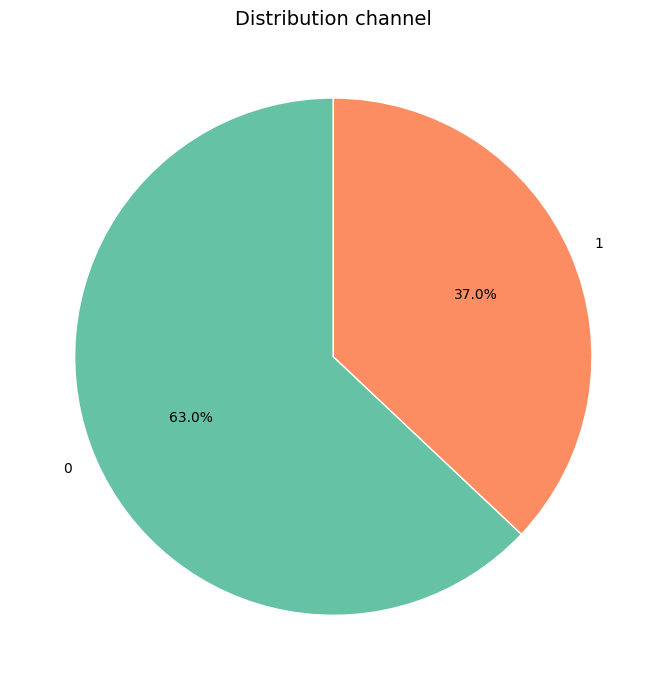

In [ ]:
# Chart - 1 visualization code
plot_pie_for_column(df, 'is_canceled', title='Distribution channel', palette='Set2')

##### 1. Why did you pick the specific chart?

I chose this pie chart to visualize the overall booking cancellation rate, showing the proportion of bookings that were canceled versus those that were not.

##### 2. What is/are the insight(s) found from the chart?

Around 37% of total bookings were canceled, which is quite significant. This highlights a major issue where more than one-third of customers did not proceed with their bookings.

##### 3. Will the gained insights help creating a positive business impact?

---


Are there any insights that lead to negative growth? Justify with specific reason.

Yes, knowing which months have higher cancellation rates helps the hotel plan better promotions, flexible booking policies, or advance payment strategies for specific months. This way, they can reduce revenue losses.



Yes, a 37% cancellation rate over three years is alarmingly high. This directly impacts revenue and planning efficiency. The hotel must urgently analyze the root causes, such as lead time issues, booking policies, or customer satisfaction problems, and implement corrective strategies.

#### Chart - 2

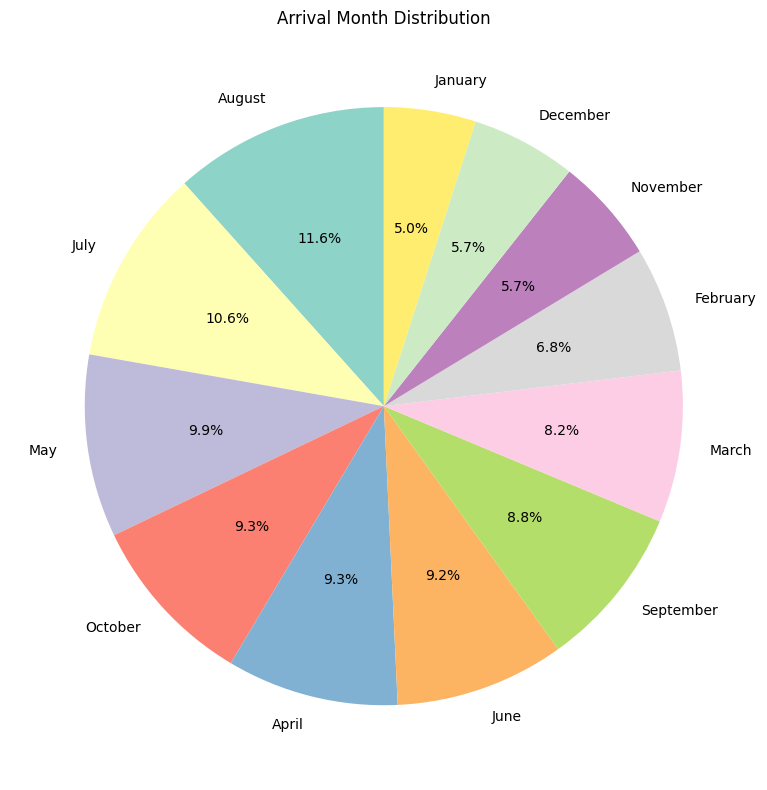

In [ ]:
# Chart - 2 visualization code
colors = sns.color_palette('Set3', df['arrival_date_month'].nunique())

df['arrival_date_month'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(8, 8),Yes, a 37% cancellation rate over three years is alarmingly high. This directly impacts revenue and planning efficiency. The hotel must urgently analyze the root causes, such as lead time issues, booking policies, or customer satisfaction problems, and implement corrective strategies.
    startangle=90,
    ylabel='',  # Removes default axis label
    title='Arrival Month Distribution',
    colors=colors
)

plt.tight_layout()
plt.show()

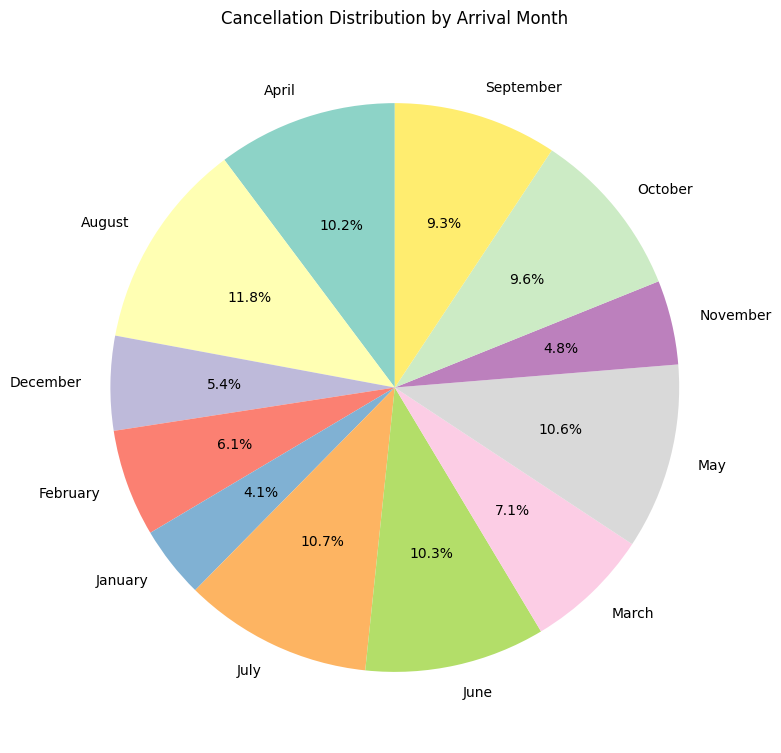

In [ ]:
# Filter only canceled bookings
canceled_bookings = df[df['is_canceled'] == 1]

# Count cancellations by month
month_cancellations = canceled_bookings['arrival_date_month'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
colors = sns.color_palette('Set3', len(month_cancellations))

month_cancellations.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    ylabel='',
    title='Cancellation Distribution by Arrival Month',
    colors=colors
)

plt.tight_layout()
plt.show()

In [ ]:
# Total bookings per month
total_per_month = df['arrival_date_month'].value_counts().sort_index()

# Total cancellations per month
canceled_per_month = df[df['is_canceled'] == 1]['arrival_date_month'].value_counts().sort_index()

# Calculate cancellation rate (%)
cancellation_rate_per_month = (canceled_per_month / total_per_month) * 100

# Display
print(cancellation_rate_per_month)


arrival_date_month
April        40.797186
August       37.753117
December     34.970501
February     33.415964
January      30.477315
July         37.453598
June         41.457172
March        32.152338
May          39.665847
November     31.233441
October      38.046595
September    39.170156
Name: count, dtype: float64


##### 1. Why did you pick the specific chart?

I chose this pie chart to visually compare the proportion of cancellations across different arrival months. It helps highlight which months face the most or least booking cancellations at a glance.

##### 2. What is/are the insight(s) found from the chart?

From the chart and data:

April, August, July, and June have higher cancellation percentages (above 37–41%).

Months like December, November, February, and January show relatively lower cancellation rates (around 30–34%).

This indicates that peak season or mid-year months tend to have higher cancellation ratios.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight allows the hotel to target high-cancellation guest types with more strict cancellation policies or offer booking incentives to reduce last-minute cancellations.



Yes. Months with cancellation rates exceeding 40% (like April and June) can severely impact revenue targets for that period. If not addressed, this could result in underutilized hotel capacity during critical months.



#### Chart - 3

In [ ]:
# Bookings with at least 1 adult and at least 1 kid (child or baby)
adults_with_kids = df[(df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0))].shape[0]

total_bookings = df.shape[0]

percent_adults_with_kids = (adults_with_kids / total_bookings) * 100

print(f"Percentage of bookings with adults and at least one kid: {percent_adults_with_kids:.2f}%")


Percentage of bookings with adults and at least one kid: 7.63%


In [ ]:

# Bookings with exactly 1 adult and no children or babies
solo_travelers = df[(df['adults'] == 1)].shape[0]

percent_solo_travelers = (solo_travelers / total_bookings) * 100

print(f"Percentage of solo travelers (1 adult, no kids): {percent_solo_travelers:.2f}%")

Percentage of solo travelers (1 adult, no kids): 19.29%


In [ ]:
# Total number of bookings
total_bookings = df.shape[0]

# Filter: Bookings with at least 2 adults and no kids
adults_no_kids_not_solo = df[(df['adults'] >= 2) & (df['children'] == 0) & (df['babies'] == 0)].shape[0]

# Calculate percentage
percent_adults_no_kids_not_solo = (adults_no_kids_not_solo / total_bookings) * 100

print(f"Percentage of bookings with at least 2 adults and no kids: {percent_adults_no_kids_not_solo:.2f}%")


Percentage of bookings with at least 2 adults and no kids: 73.12%


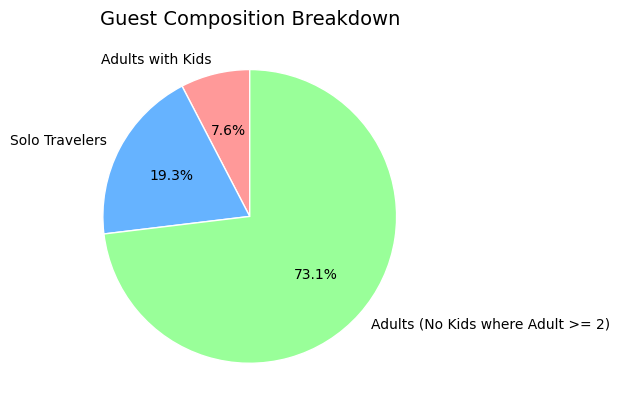

In [ ]:
# Chart - 3 visualization code
# Data values (Your pre-calculated percentages for total guest composition)
values = [
    percent_adults_with_kids,
    percent_solo_travelers,
    percent_adults_no_kids_not_solo
]

# Labels for each section
labels = [
    'Adults with Kids',
    'Solo Travelers',
    'Adults (No Kids where Adult >= 2)'
]

# Custom colors (same as your previous chart)
colors = ['#FF9999', '#66B3FF', '#99FF99']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Guest Composition Breakdown', fontsize=14)
plt.tight_layout()
plt.show()



In [ ]:
# Filter DataFrames for each guest type
adults_with_kids_df = df[(df['adults'] > 0) & ((df['children'] > 0) | (df['babies'] > 0))]
solo_travelers_df = df[(df['adults'] == 1) & (df['children'] == 0) & (df['babies'] == 0)]
adults_no_kids_not_solo_df = df[(df['adults'] >= 2) & (df['children'] == 0) & (df['babies'] == 0)]

<Figure size 600x600 with 0 Axes>

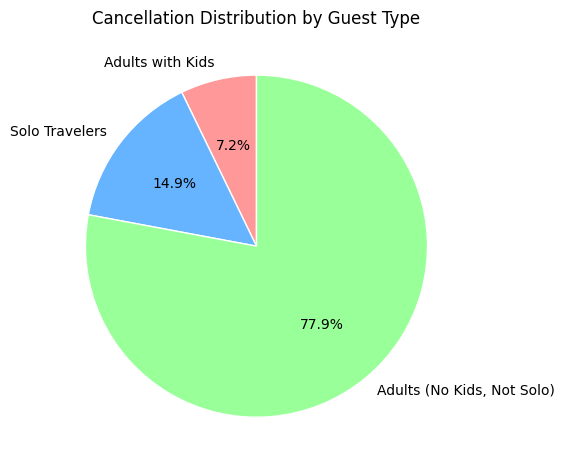

In [ ]:
# Total cancellations per guest type
cancel_counts = {
    'Adults with Kids': adults_with_kids_df['is_canceled'].sum(),
    'Solo Travelers': solo_travelers_df['is_canceled'].sum(),
    'Adults (No Kids, Not Solo)': adults_no_kids_not_solo_df['is_canceled'].sum()
}

cancel_df = pd.DataFrame.from_dict(cancel_counts, orient='index', columns=['Cancellations'])

# Same custom colors
colors = ['#FF9999', '#66B3FF', '#99FF99']

# Plot
plt.figure(figsize=(6, 6))
cancel_df.plot.pie(
    y='Cancellations',
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    legend=False,
    wedgeprops={'edgecolor': 'white'},
    title='Cancellation Distribution by Guest Type'
)

plt.ylabel('')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

I picked this pie chart to visually analyze which type of guest contributes the most to booking cancellations. It helps break down cancellations by guest category in a simple, understandable way.

##### 2. What is/are the insight(s) found from the chart?

Adults without kids (non-solo travelers) account for nearly 78% of all cancellations, making them the largest contributor.

Solo travelers account for around 15%, while adults with kids contribute the least, at around 7%.

This shows that group travelers without kids are the most likely to cancel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. This insight allows the hotel to target high-cancellation guest types with more strict cancellation policies or offer booking incentives to reduce last-minute cancellations.



Yes. Since more than three-quarters of cancellations come from adults without kids, this segment presents a high risk for revenue loss. If left unchecked, such a high cancellation rate from this group could reduce occupancy rates and affect seasonal revenues.


#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Total bookings for percentage calculation
total_bookings = df.shape[0]

# Calculate count and percentage per market segment
market_counts = df['market_segment'].value_counts()
market_percent = (market_counts / total_bookings) * 100

# Plot horizontal bar chart
plt.figure(figsize=(8, 6))
bars = plt.barh(market_counts.index, market_counts.values, color=sns.color_palette('Set2'))

# Annotate percentage next to each bar
for index, value in enumerate(market_counts.values):
    plt.text(
        value + (total_bookings * 0.002),  # Position to the right of the bar
        index,
        f'{market_percent.values[index]:.1f}%',
        va='center',
        fontsize=9
    )

plt.xlabel('Number of Bookings')
plt.title('Booking Distribution by Market Segment (with %)')
plt.tight_layout()
plt.show()


/tmp/ipython-input-9-2180089348.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


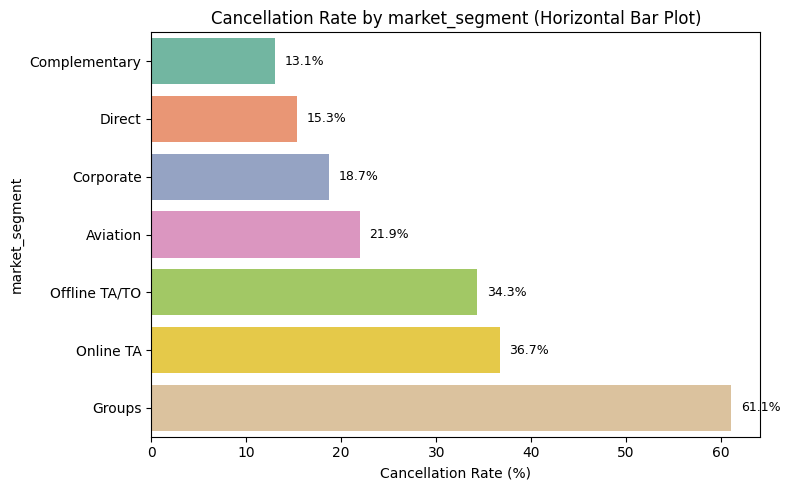

In [ ]:
df = df[df['market_segment'] != 'Undefined']
plot_cancellation_rate_by_category(df, 'market_segment')

##### 1. Why did you pick the specific chart?

I picked this horizontal bar chart to easily compare cancellation rates across different market segments (like Groups, Online TA, Direct bookings, etc.). It makes spotting the highest-risk segments very clear.

##### 2. What is/are the insight(s) found from the chart?

The "Groups" segment has the highest cancellation rate at around 61%, followed by Online Travel Agencies (36.7%) and Offline Travel Agencies (34.3%).

Segments like Direct bookings and Corporate show relatively lower cancellation rates (below 20%).



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Knowing which market segments are most prone to cancellations can help the business:

Implement stricter cancellation policies for high-risk segments (like Groups)

Offer incentives or flexible booking options for low-risk segments to attract them more

Better forecast demand and reduce revenue loss due to last-minute cancellations



Yes. The high cancellation rate in the Groups and Online TA segments means the hotel is at serious risk of overbooking or under-utilization.
Not managing this could lead to financial losses, poor customer experience, and wasted resources (like blocked room inventory for guests who never arrive).



#### Chart - 5

<Axes: ylabel='count'>

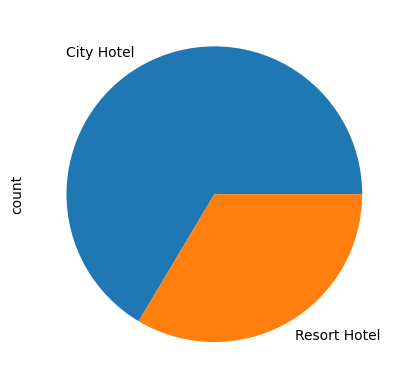

In [ ]:
# Chart - 5 visualization code
df['hotel'].value_counts().plot(kind='pie')

/tmp/ipython-input-9-2180089348.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


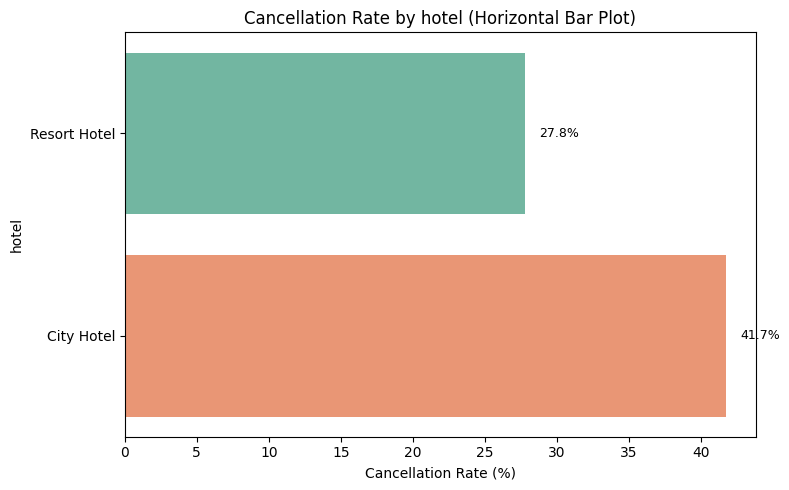

In [ ]:
plot_cancellation_rate_by_category(df, 'hotel')

##### 1. Why did you pick the specific chart?

I picked this horizontal bar chart to compare the cancellation rates between City Hotels and Resort Hotels. The side-by-side comparison makes it visually easy to identify which hotel type faces more cancellati

##### 2. What is/are the insight(s) found from the chart?

The City Hotel has a higher cancellation rate (41.7%) compared to Resort Hotel (27.8%).

This shows that guests booking City Hotels are more likely to cancel their reservations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By knowing that City Hotels have a higher cancellation risk, the hotel management can:

Implement targeted retention strategies (like better refund policies or flexible booking options) for City Hotels

Reconsider overbooking policies for City Hotels to mitigate revenue loss

Focus more marketing efforts on Resort Hotel bookings which show more stability

Yes.
If the high cancellation rate at City Hotels continues, it can result in lost revenue, last-minute vacant rooms, and poor resource planning.
This trend needs immediate attention with focused customer engagement, promotions, and stricter cancellation policies for City Hotel bookings.

#### Chart - 6

<Axes: ylabel='count'>

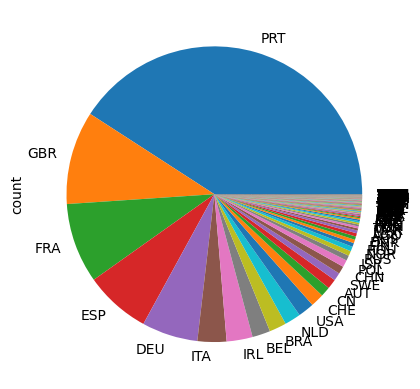

In [ ]:
# Chart - 6 visualization code
#Plot a graph for country
df['country'].value_counts().plot(kind='pie')


##### 1. Why did you pick the specific chart?

I picked this pie chart to clearly visualize from which countries most of our guests are coming. It helps in understanding the dominant customer base by country.



##### 2. What is/are the insight(s) found from the chart?

Portugal (PRT) contributes the largest share of bookings, followed by the United Kingdom (GBR) and France (FRA).

Most of the guests are from European countries.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Impact:
Knowing the top guest-origin countries helps the hotel to:

Target marketing campaigns specifically in Portugal, UK, and France

Create localized offers or language-specific services for guests from these countries

Build partnerships with local travel agencies in these regions



negative growth reason:
Yes.
There is a heavy dependency on a few specific countries (like Portugal).
If the travel demand from these countries drops due to any reason (like economic downturns, visa issues, etc.), it could severely impact booking volumes.
Hotels should diversify their customer base by focusing on attracting guests from underrepresented countries to reduce risk.

#### Chart - 7

In [ ]:
#repeated guests
df['is_repeated_guest'].value_counts(normalize=True) * 100

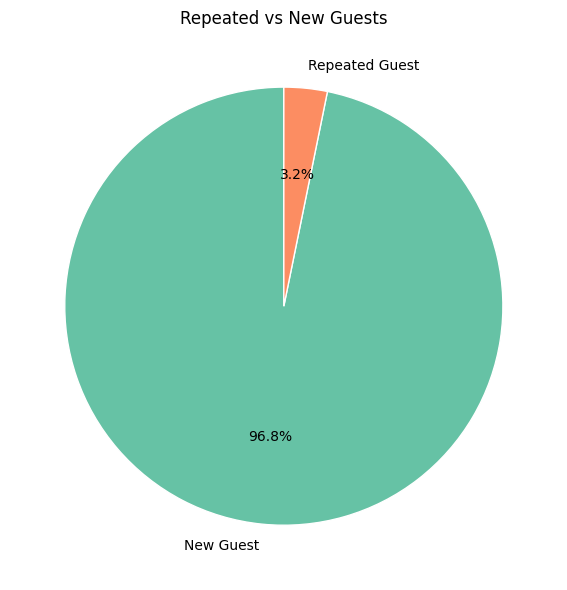

In [ ]:
# Chart - 7 visualization code
df['is_repeated_guest'].value_counts().plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=90,
    figsize=(6, 6),
    labels=['New Guest', 'Repeated Guest'],
    colors=sns.color_palette('Set2'),
    wedgeprops={'edgecolor': 'white'}
)

plt.ylabel('')  # Hide default y-axis label
plt.title('Repeated vs New Guests')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

To analyze how many of our hotel bookings come from new guests versus repeat guests. This helps in understanding guest loyalty and repeat business potential.



##### 2. What is/are the insight(s) found from the chart?

The chart clearly shows that 96.8% of guests are new, while only 3.2% are repeat guests. This indicates a very low repeat customer rate.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
Since the majority (96.8%) of guests are new, the hotel can focus on improving first-time guest experiences and implementing targeted loyalty programs to convert them into repeat customers. This can increase future booking rates and build a loyal customer base.

Negative growth reason:
Having only 3.2% repeat guests indicates poor customer retention. This can lead to higher marketing and acquisition costs in the long term. If the hotel continues relying mainly on new guests without building guest loyalty, it can face declining revenue stability and higher customer churn.

#### Chart - 8

In [ ]:
# Chart - 8 visualization code
ct = pd.crosstab(df['reserved_room_type'], df['assigned_room_type'])
print(ct)

assigned_room_type      A     B     C      D     E     F     G    H    I    K  \
reserved_room_type                                                              
A                   73598  1123  1447   7548  1156   417   186   94  215  210   
B                     111   986     0      5     2     2     8    0    0    2   
C                       5     2   883      6     4     2    10   10   10    0   
D                     312    27    34  17736   686   204    82    9   67   44   
E                      15     3     8     22  5923   404   100    4   40   16   
F                       6    17     0      4    31  2707   116    3   10    3   
G                       5     2     2      0     4    14  2041    7   15    4   
H                       0     0     0      1     0     0    10  584    6    0   
L                       1     1     1      0     0     1     0    1    0    0   
P                       0     0     0      0     0     0     0    0    0    0   

assigned_room_type  L   P  

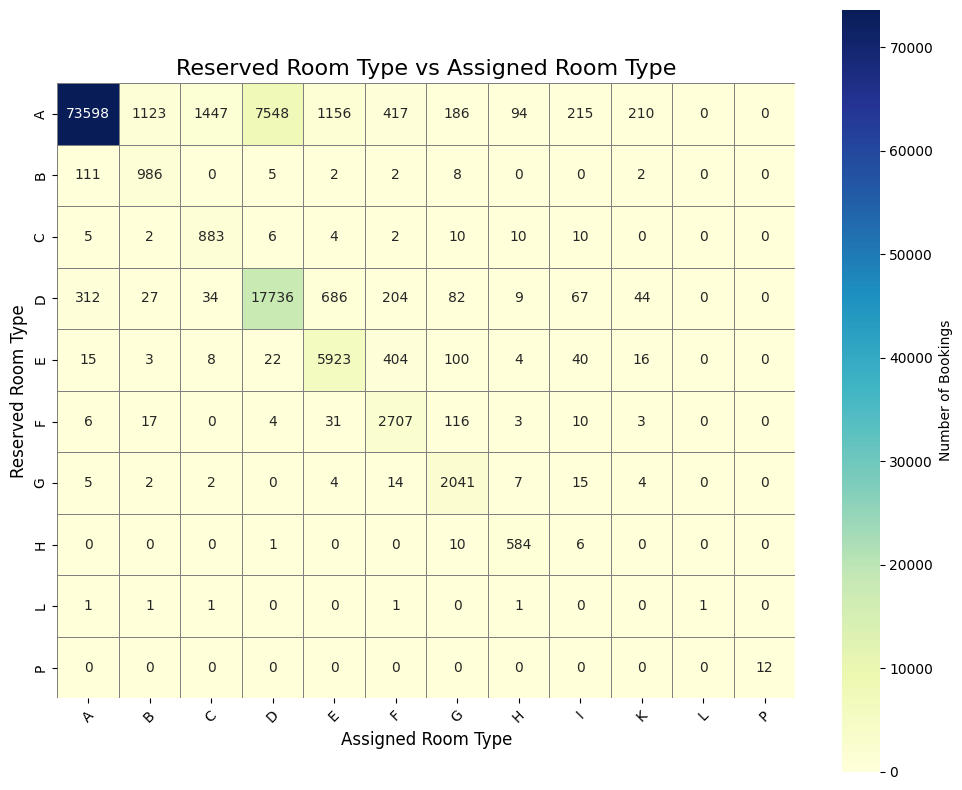

In [ ]:
# Assuming `ct` is your crosstab DataFrame
plt.figure(figsize=(10, 8))

sns.heatmap(
    ct,
    annot=True,
    fmt='g',  # Keeps large numbers readable (no scientific notation)
    cmap='YlGnBu',  # Softer color palette for better readability
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Number of Bookings'},  # Colorbar label
    square=True
)

plt.title('Reserved Room Type vs Assigned Room Type', fontsize=16)
plt.xlabel('Assigned Room Type', fontsize=12)
plt.ylabel('Reserved Room Type', fontsize=12)
plt.xticks(rotation=45)  # Tilt x-axis labels for space
plt.tight_layout()
plt.show()

In [ ]:
# Total bookings
total_bookings = ct.values.sum()

# Sum of diagonal values (where reserved room type == assigned room type)
correct_bookings = np.trace(ct.values)

# Percentage
percentage_correct = (correct_bookings / total_bookings) * 100

print(f"Percentage of guests who got the room they reserved: {percentage_correct:.2f}%")

Percentage of guests who got the room they reserved: 87.49%


In [ ]:
# Step 1: Filter rows where assigned room type ≠ reserved room type
mismatch_df = df[df['reserved_room_type'] != df['assigned_room_type']]

# Step 2: Total number of mismatches
total_mismatches = mismatch_df.shape[0]

# Step 3: Number of cancellations among mismatches
canceled_mismatches = mismatch_df['is_canceled'].sum()

# Step 4: Calculate the percentage
percent_canceled_mismatches = (canceled_mismatches / total_mismatches) * 100

# Step 5: Display results
print(f"Out of {total_mismatches} mismatched bookings, {canceled_mismatches} canceled.")
print(f"That’s {percent_canceled_mismatches:.2f}% of the mismatched bookings.")


Out of 14917 mismatched bookings, 802 canceled.
That’s 5.38% of the mismatched bookings.


##### 1. Why did you pick the specific chart?

I chose this heatmap to check how often the hotel actually assigns the reserved room type versus giving guests a different room type. It clearly shows the distribution of room mismatches across all bookings.

##### 2. What is/are the insight(s) found from the chart?

87.49% of guests got the exact room type they had reserved, showing high operational accuracy.

12.5% of guests experienced a room type mismatch, meaning they were assigned a different room category.

Out of these mismatched bookings, 802 resulted in cancellations, which is a small but notable number.

Despite mismatches, the majority of affected guests still chose to stay.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
Yes. This data shows that the hotel already maintains a high room assignment accuracy rate (87.49%). However, by further reducing mismatches, the hotel can improve guest satisfaction, potentially increase repeat bookings, and reduce the small number of cancellations caused by mismatches.

Negative growth reason:
Yes. Although only 802 bookings were canceled due to room mismatches, it still represents lost revenue and a risk to customer satisfaction. If left unaddressed, recurring room mismatches could lead to poor online reviews and reduced customer trust, ultimately impacting future bookings and revenue growth.

#### Chart - 9

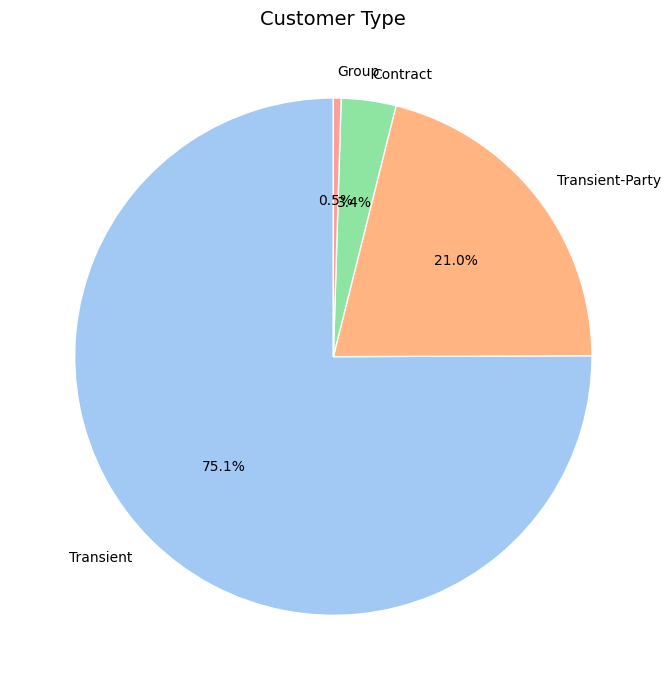

In [ ]:
# Chart - 9 visualization code
plot_pie_for_column(df, 'customer_type', title='Customer Type', palette='pastel')

/tmp/ipython-input-9-2180089348.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


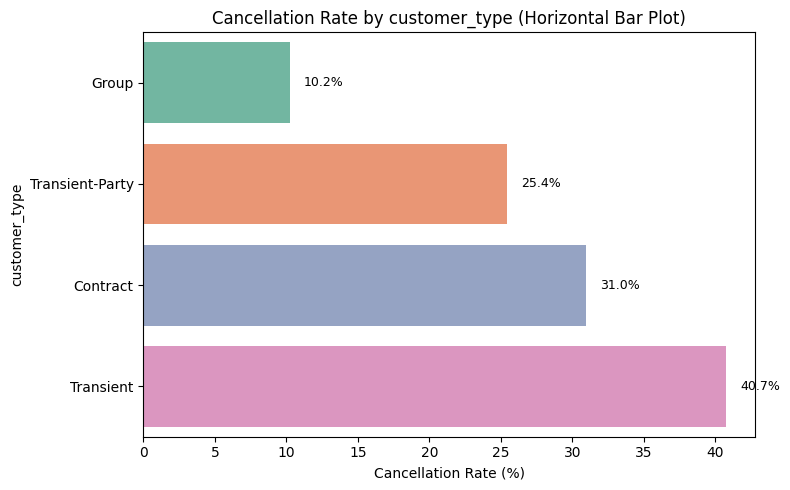

In [ ]:
plot_cancellation_rate_by_category(df, 'customer_type')

##### 1. Why did you pick the specific chart?

I chose this horizontal bar chart to clearly compare cancellation rates across different customer types like Transient, Contract, Group, and Transient-Party.

##### 2. What is/are the insight(s) found from the chart?

Transient customers have the highest cancellation rate (around 40.7%), followed by Contract and Transient-Party customers.

Group customers have the lowest cancellation rate (around 10.2%), indicating more stable bookings from them.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 positive business impact:
By knowing that Transient customers cancel the most, the hotel can:

Implement stricter cancellation policies for this segment

Offer incentives (like discounts) for confirmed bookings

Focus on increasing Group and Contract bookings, which have lower cancellation rates




negative growth reason:
The high cancellation rate among Transient customers is a risk for the business.
This could cause unpredictable occupancy levels and revenue loss.
To avoid negative growth, targeted retention strategies and more flexible booking options for these customers should be introduced.



#### Chart - 10

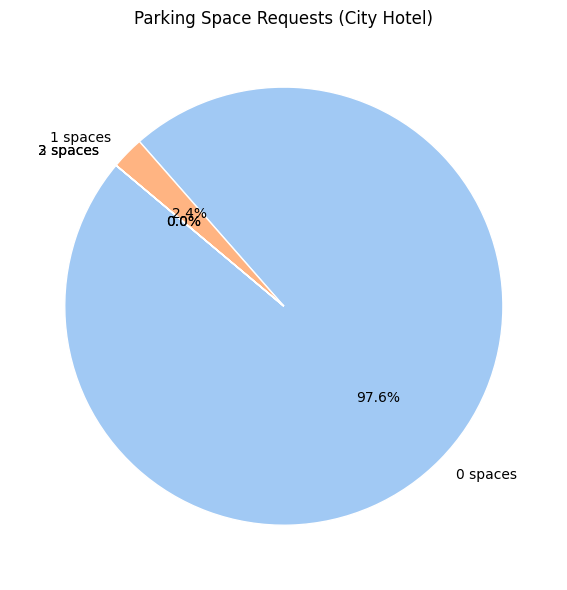

In [ ]:
# Filter for City Hotel only
city_hotel_df = df[df['hotel'] == 'City Hotel']

# Count of each parking space request (0, 1, 2, etc.)
parking_counts = city_hotel_df['required_car_parking_spaces'].value_counts().sort_index()

# Calculate percentage
parking_percent = (parking_counts / parking_counts.sum()) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel', len(parking_counts))

plt.pie(
    parking_counts,
    labels=[f'{space} spaces' for space in parking_counts.index],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Parking Space Requests (City Hotel)')
plt.tight_layout()
plt.show()


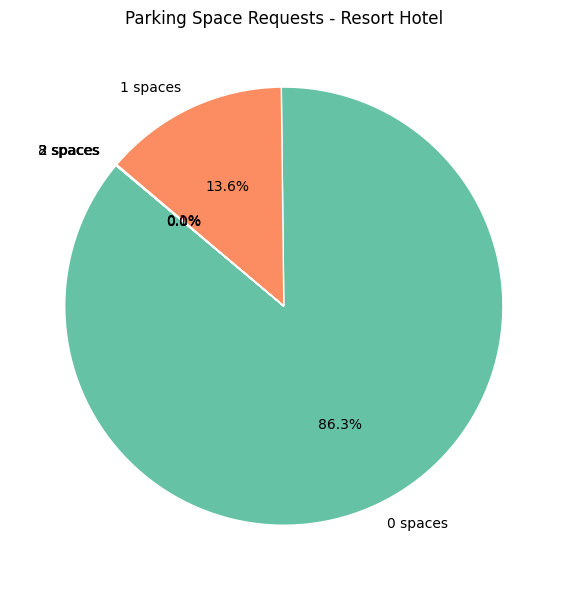

In [ ]:
# For Resort Hotel
resort_df = df[df['hotel'] == 'Resort Hotel']
parking_counts = resort_df['required_car_parking_spaces'].value_counts().sort_index()
colors = sns.color_palette('Set2', len(parking_counts))

plt.figure(figsize=(6, 6))
plt.pie(
    parking_counts,
    labels=[f'{space} spaces' for space in parking_counts.index],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Parking Space Requests - Resort Hotel')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

I picked the pie chart to show the proportion of guests requesting different numbers of parking spaces at both Resort Hotel and City Hotel in a clear and visual way.

##### 2. What is/are the insight(s) found from the chart?

At the Resort Hotel, most guests (around 97.6%) do not request any parking space, and only a small percentage request 1 or 2 spaces.

The City Hotel shows slightly more parking requests than Resort Hotel, but still a majority don't request parking.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive buisness impact: The hotel management can optimize parking space allocation and avoid overbuilding parking areas, especially at the Resort Hotel where demand is low.

It can help reduce unnecessary maintenance and operational costs for underutilized parking.

 negative growth reason: If the hotel invests in building too much parking without analyzing this kind of data, it can lead to wasted investment and operational losses.
These insights help the hotel avoid poor capital expenditure decisions.

#### Chart - 11

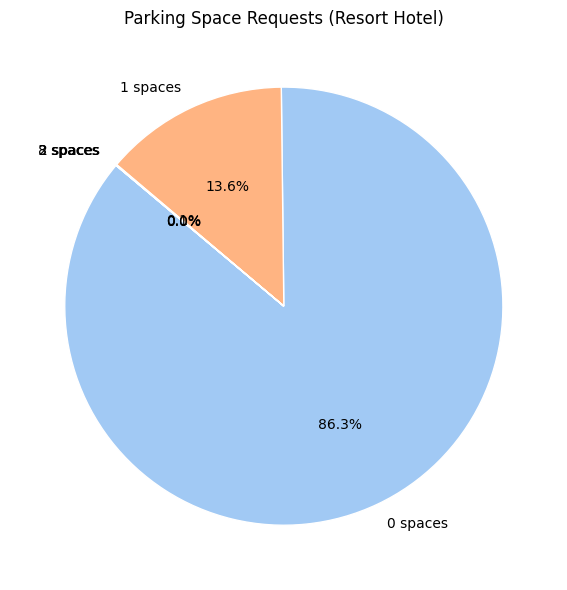

In [ ]:
# Chart - 11 visualization code
# Filter for Resort Hotel only
resort_hotel_df = df[df['hotel'] == 'Resort Hotel']

# Count of each parking space request (0, 1, 2, etc.)
parking_counts_resort = resort_hotel_df['required_car_parking_spaces'].value_counts().sort_index()

# Calculate percentage
parking_percent_resort = (parking_counts_resort / parking_counts_resort.sum()) * 100

# Plot pie chart
plt.figure(figsize=(6, 6))
colors = sns.color_palette('pastel', len(parking_counts_resort))

plt.pie(
    parking_counts_resort,
    labels=[f'{space} spaces' for space in parking_counts_resort.index],
    autopct='%1.1f%%',
    colors=colors,
    startangle=140,
    wedgeprops={'edgecolor': 'white'}
)

plt.title('Parking Space Requests (Resort Hotel)')
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

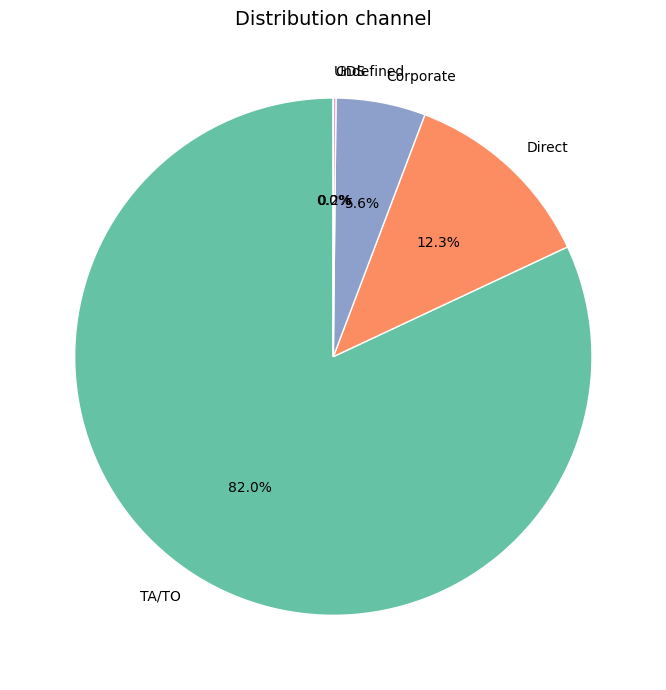

In [ ]:
plot_pie_for_column(df, 'distribution_channel', title='Distribution channel', palette='Set2')


/tmp/ipython-input-9-2180089348.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


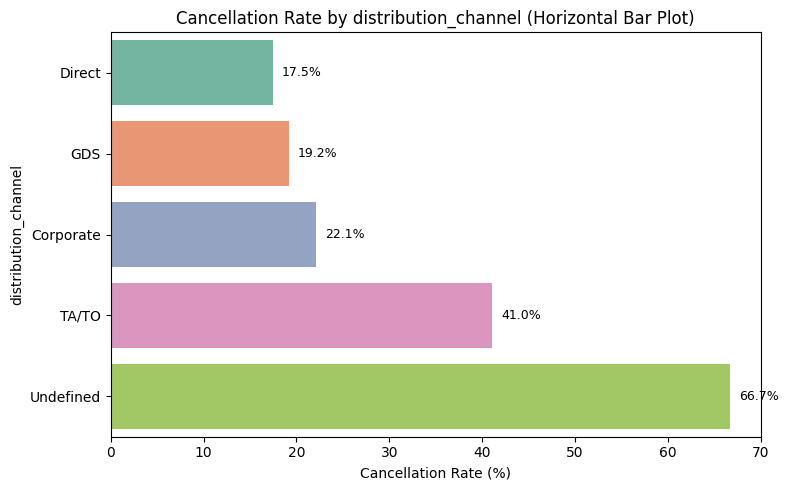

In [ ]:
plot_cancellation_rate_by_category(df, 'distribution_channel')

##### 1. Why did you pick the specific chart?

I picked these charts to understand how hotel bookings are distributed across different sales channels and how each channel’s cancellation rate compares. This helps identify which channels are most popular and which ones are contributing most to cancellations.



##### 2. What is/are the insight(s) found from the chart?

82% of bookings come through the "TA/TO" (Travel Agent / Tour Operator) channel, making it the dominant source of customers.

The highest cancellation rate (66.7%) is seen in the "Undefined" channel, followed by 41% for "TA/TO" and 22.1% for Corporate bookings.

Direct bookings have the lowest cancellation rate (17.5%), making them more reliable.

Even though "TA/TO" brings the most guests, it also contributes significantly to cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:
Yes. By focusing on increasing bookings from low-cancellation channels like Direct and Corporate, the hotel can reduce overall cancellation rates. The hotel can also negotiate better terms with travel agencies or run targeted campaigns to encourage confirmed bookings from high-cancel segments.

Negative growth reason:
Yes. Relying too heavily on the TA/TO channel (which shows a 41% cancellation rate) increases business risk and revenue unpredictability. Also, the high 66.7% cancellation rate in the "Undefined" channel signals poor data quality or tracking errors, which can affect decision-making and forecasting.

#### Chart - 13

/tmp/ipython-input-332-618342026.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


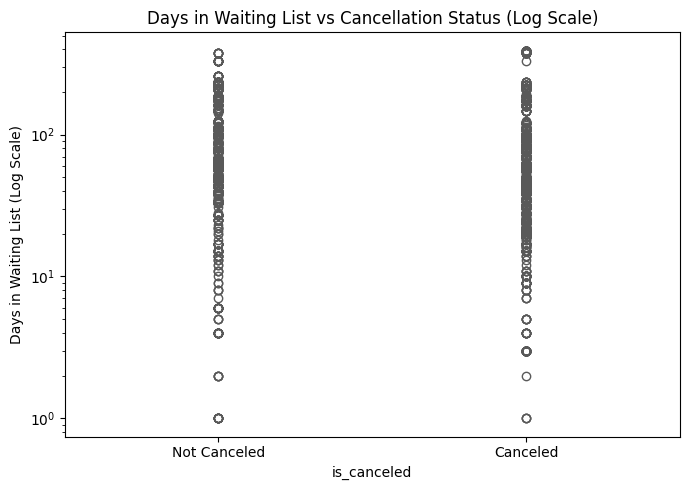

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(7, 5))
sns.boxplot(
    x='is_canceled',
    y='days_in_waiting_list',
    data=df,
    palette='Set2'
)
plt.yscale('log')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.ylabel('Days in Waiting List (Log Scale)')
plt.title('Days in Waiting List vs Cancellation Status (Log Scale)')
plt.tight_layout()
plt.show()



##### 1. Why did you pick the specific chart?

'I picked this boxplot (on a log scale) to visually compare the distribution of waiting list days between bookings that got canceled and those that did not. It helps highlight the influence of longer waiting times on customer cancellation behavior.'

##### 2. What is/are the insight(s) found from the chart?

'The chart shows that bookings with a higher number of days on the waiting list are much more likely to get canceled compared to those with fewer waiting days. Canceled bookings have a visibly higher spread and concentration at higher waiting times, even on a log scale.'



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive buisness impact: Yes. By reducing waiting list days through better room inventory management or giving priority booking to customers on the waiting list, the hotel can minimize cancellations, improve customer satisfaction, and increase booking conversion rates

Reason for negative growth: Yes. If the hotel ignores this insight and continues to let customers wait too long without communication or booking confirmation, it will face higher cancellations, poor occupancy planning, and potential loss of loyal customers.

#### Chart - 14 - Correlation Heatmap

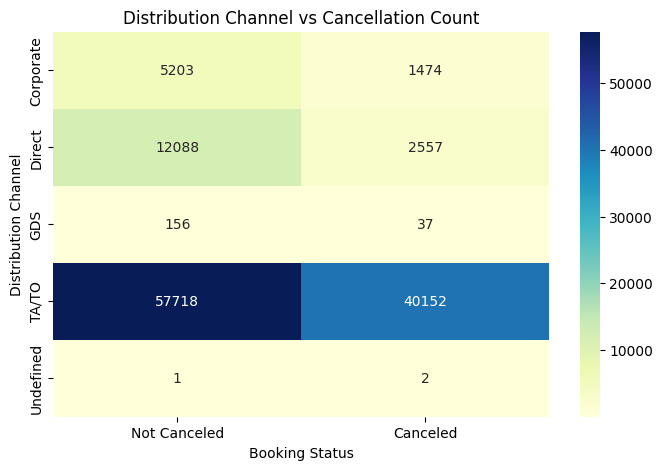

In [ ]:
# Correlation Heatmap visualization code
# Cross-tabulation: Distribution channel vs Cancellations
channel_cancellation = pd.crosstab(df['distribution_channel'], df['is_canceled'])

# Optional: Rename columns for better labels
channel_cancellation.columns = ['Not Canceled', 'Canceled']

# Plot Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(channel_cancellation, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Distribution Channel vs Cancellation Count')
plt.xlabel('Booking Status')
plt.ylabel('Distribution Channel')

plt.show()

##### 1. Why did you pick the specific chart?

I chose the heatmap to visually compare the number of cancellations and non-cancellations across different distribution channels in one compact view. It helps spot which channel is causing more cancellations at a glance.

##### 2. What is/are the insight(s) found from the chart?

The TA/TO (Travel Agents / Tour Operators) channel has the highest number of both bookings and cancellations. It clearly dominates in volume but also shows a large number of cancellations (over 40,000).
The Direct and Corporate channels have much fewer cancellations compared to TA/TO.




#### Chart - 15 - Pair Plot

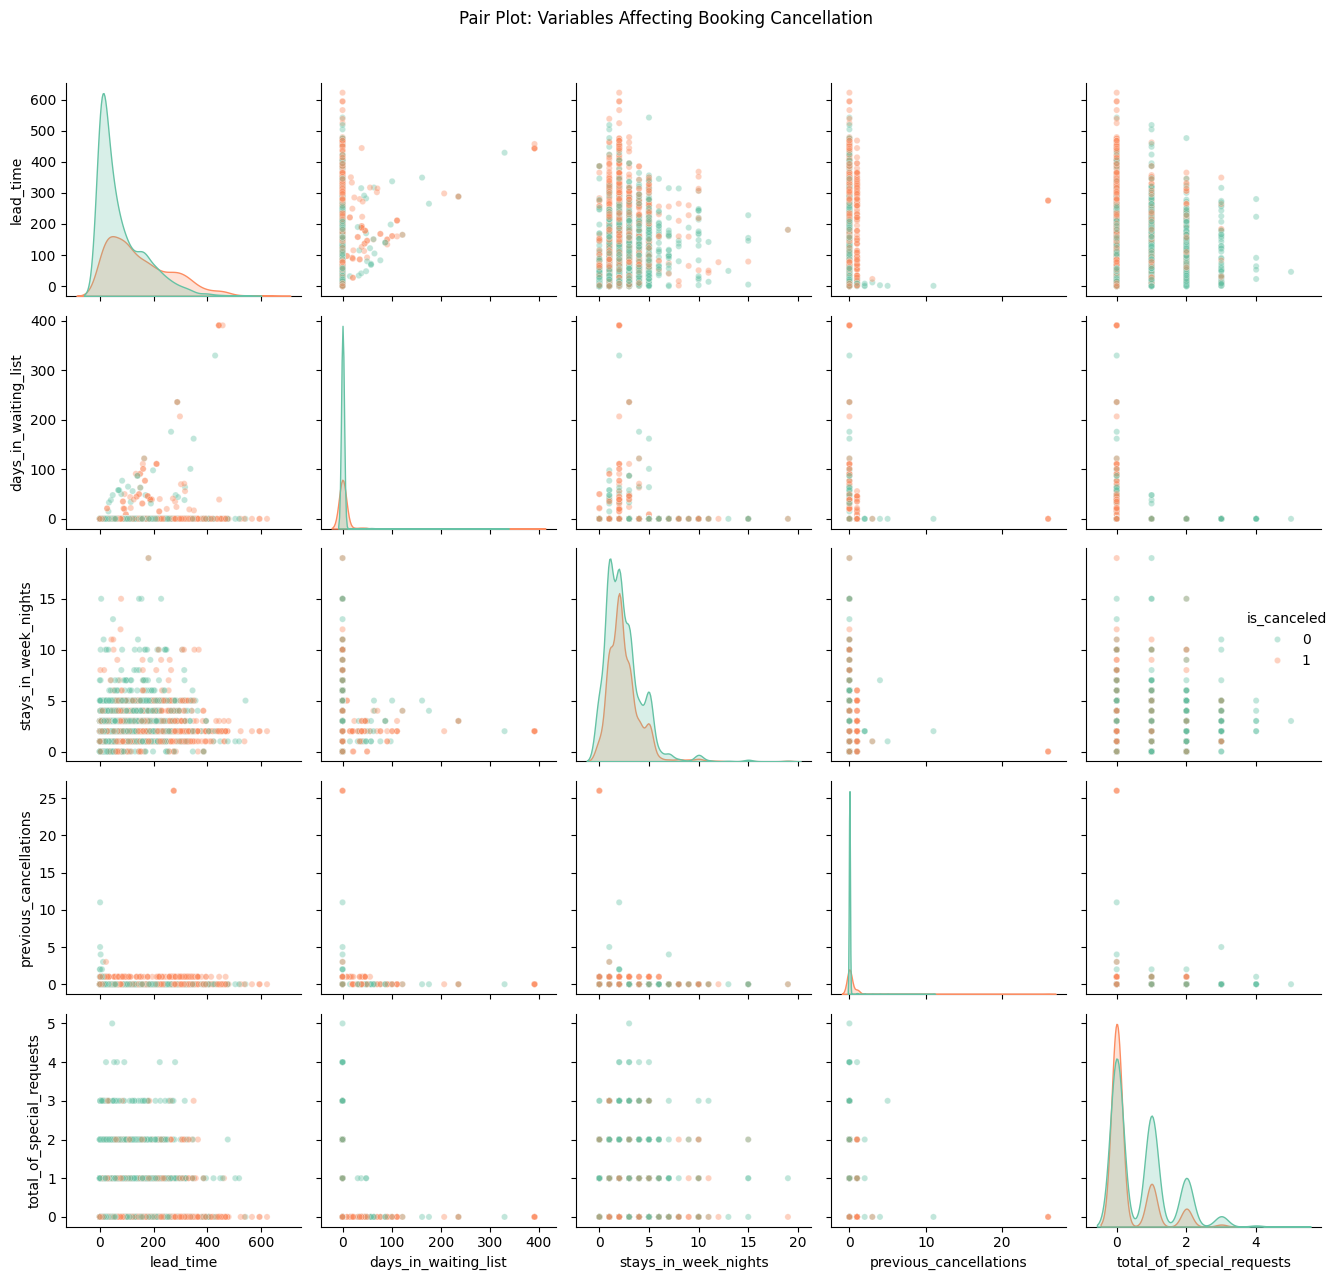

In [ ]:
# Pair Plot visualization code

pairplot_columns = [
    'is_canceled',
    'lead_time',
    'days_in_waiting_list',
    'stays_in_week_nights',
    'previous_cancellations',
    'total_of_special_requests'
]

df_sample = df[pairplot_columns].sample(n=3000, random_state=42)

# Pair Plot
sns.pairplot(
    df_sample,
    hue='is_canceled',
    palette='Set2',
    diag_kind='kde',  # Show density on diagonals
    plot_kws={'alpha': 0.4, 's': 20}  # Make points smaller and semi-transparent
)

plt.suptitle('Pair Plot: Variables Affecting Booking Cancellation', y=1.02)
plt.tight_layout()
plt.show()


##### 1. Why did you pick the specific chart?

'I picked the pair plot because it allows us to visually explore the relationship and distribution between multiple variables affecting booking cancellations. It helps in identifying patterns, correlations, and clusters across factors like lead time, days in waiting list, previous cancellations, stays during week nights, and special requests.'

##### 2. What is/are the insight(s) found from the chart?

'The insights from the chart show that bookings with longer lead times, more days on the waiting list, and a higher number of previous cancellations tend to have higher cancellation rates. Additionally, bookings with fewer special requests seem more likely to cancel compared to those with many special requests.'

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Reduce Waiting List Times

Improve room inventory management

Enable faster confirmations

Offer alternatives when fully booked

Send proactive updates to keep customer interest alive

Better Manage High-Risk Segments

Target communication for Online TA customers and transient customer types

Offer flexible policies for high-cancellation channels

Improve Room Assignment Process

Ensure guests get the room type they booked to improve satisfaction

Use Meal & Weekend Stay Insights

Upsell food packages during weekend nights to increase revenue from non-cancelled stays

# **Conclusion**

While many factors contributed to cancellations, the waiting list duration was the most direct and impactful root cause.
By addressing this, the hotel can significantly reduce cancellations, improve customer satisfaction, and boost revenue stability.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***